<a href="https://www.kaggle.com/code/ccncay/01-linear-regression-ecommerce?scriptVersionId=216991577" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is my personal training book. I am doing one workbook per ML algorythm and the goal is to use each important algorythm on a dataset where it makes sense. 
I follow tutorials linked below but do not copy and paste, rather type out everything. Sometimes I stop fot plotting things differently to have important plot types or settings. 
I make it public so I can have access to it without logging in. 

This is number 1 of the series, about Linear regression.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


import warnings
warnings.filterwarnings('ignore')

#for the pairwise comparison
import itertools
from scipy.stats.stats import pearsonr

import statsmodels.api as sm

import pylab 
import scipy.stats as stats

/kaggle/input/ecommerce-linreg/ecommerce.csv


In [2]:
df = pd.read_csv("/kaggle/input/ecommerce-linreg/ecommerce.csv")

In [3]:
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


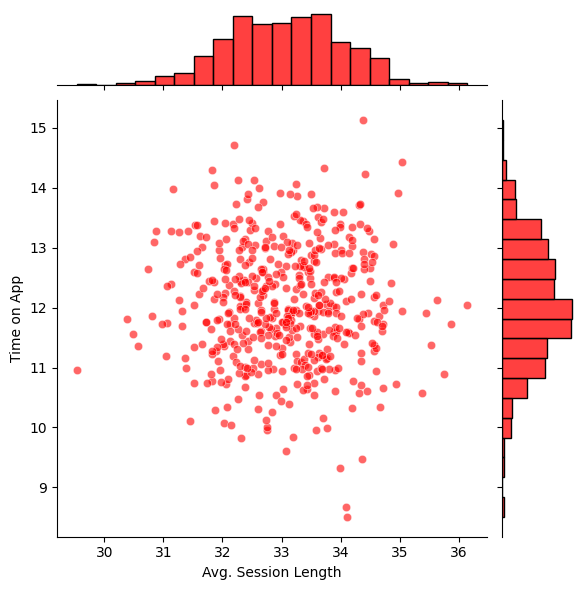

In [6]:
sns.jointplot(x="Avg. Session Length", y="Time on App", data = df, alpha = 0.6, color = "red")

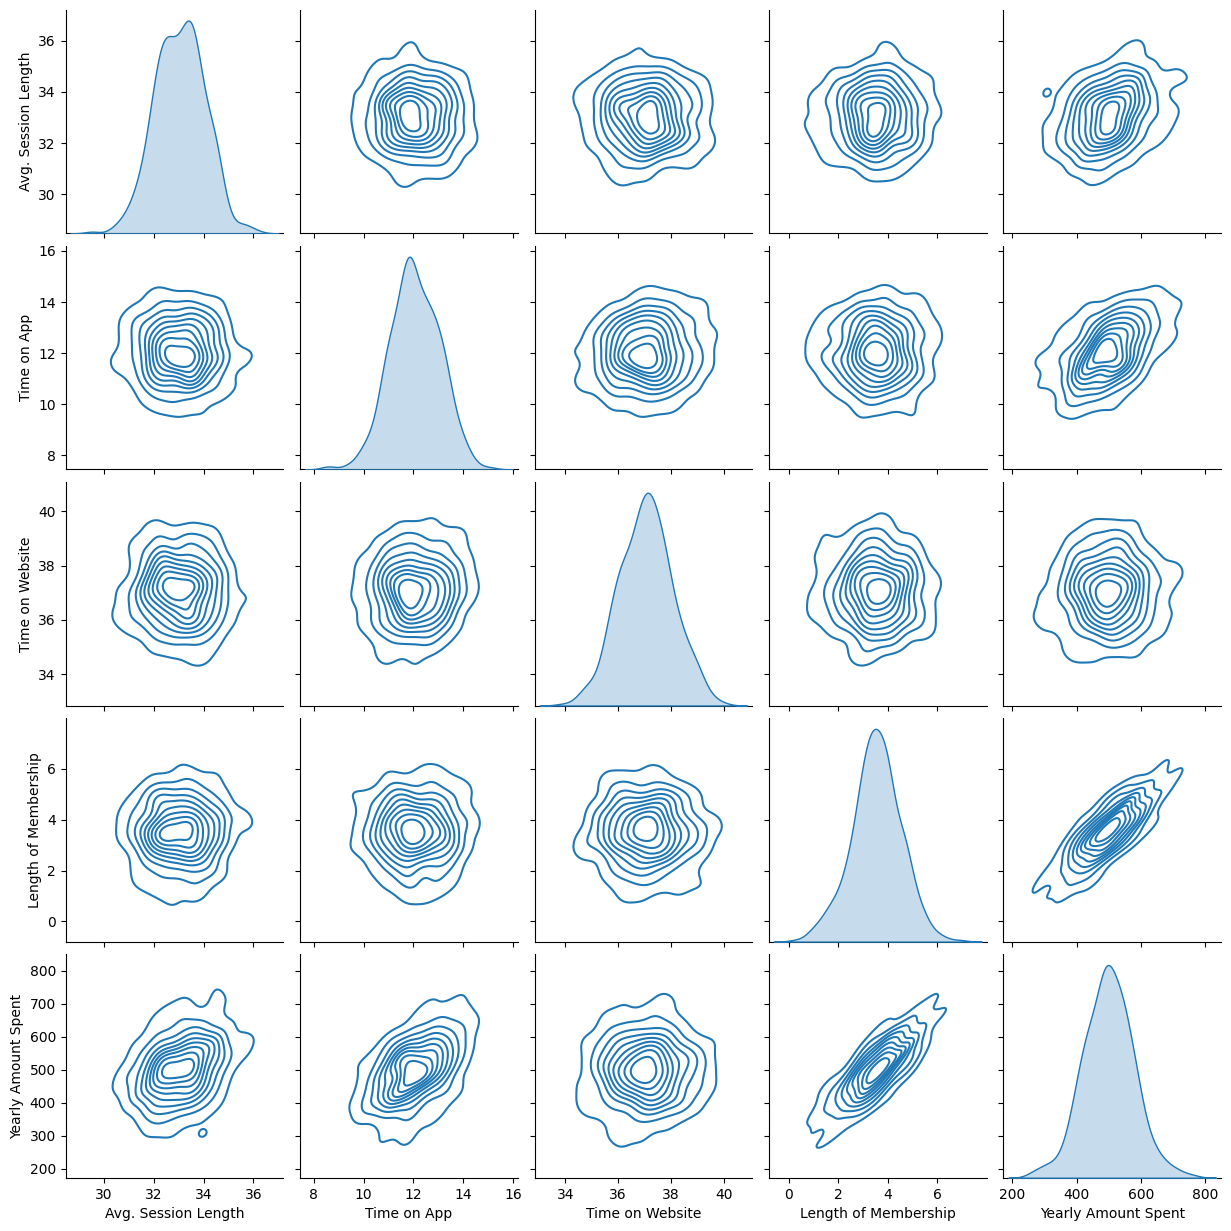

In [7]:
#pairplot
#kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}

sns.pairplot (df, kind = "kde",)


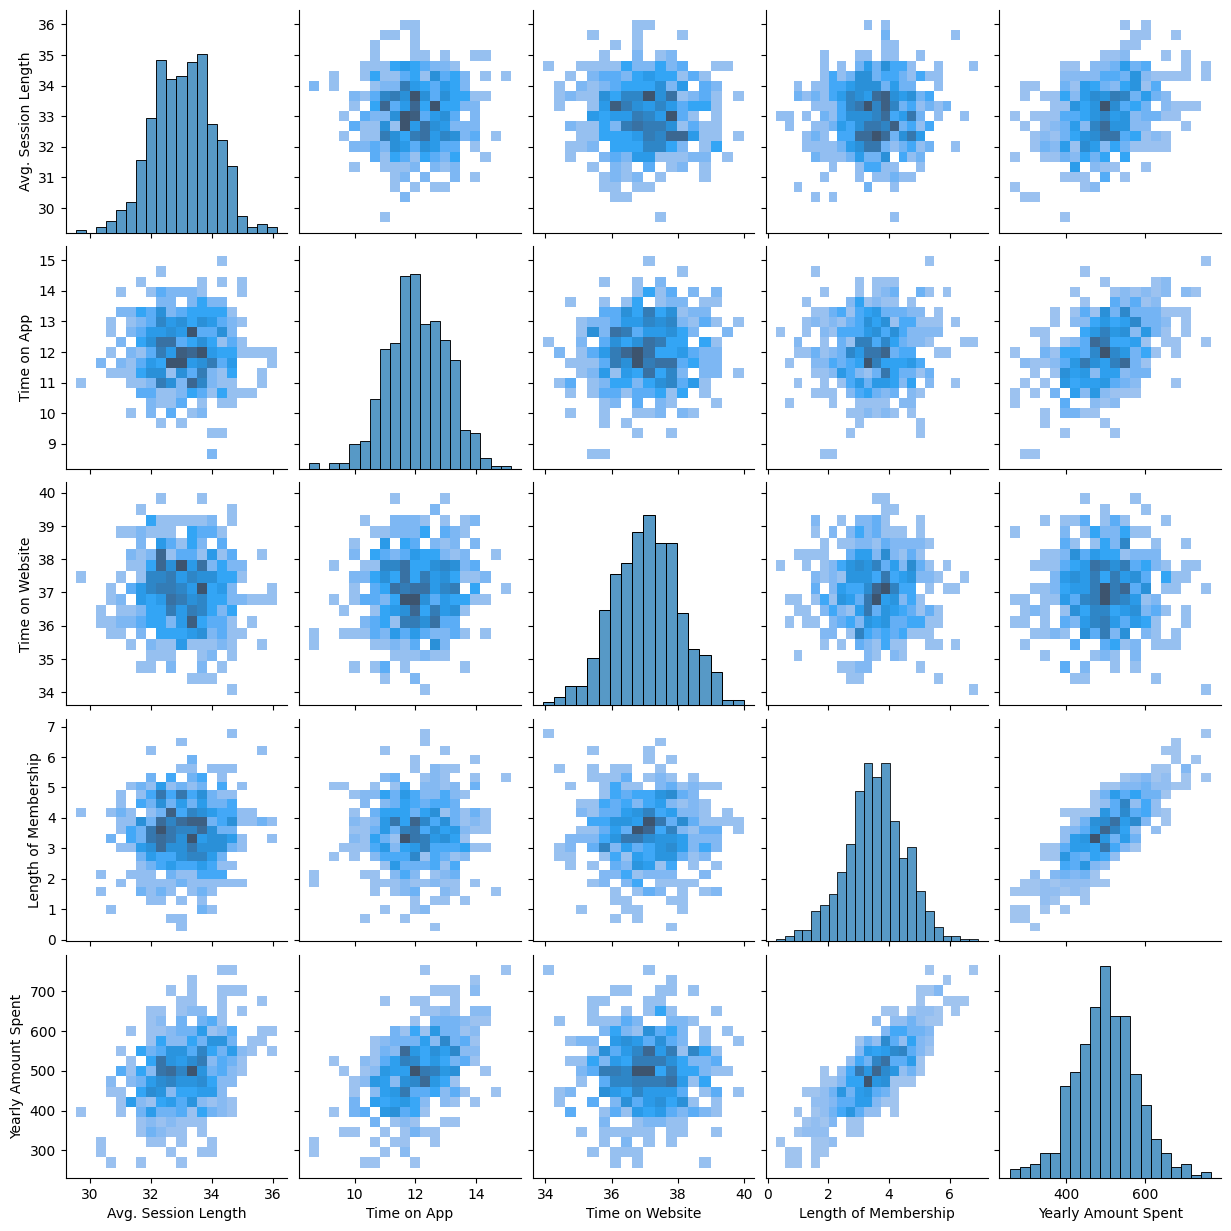

In [8]:
sns.pairplot (df, kind = "hist",)

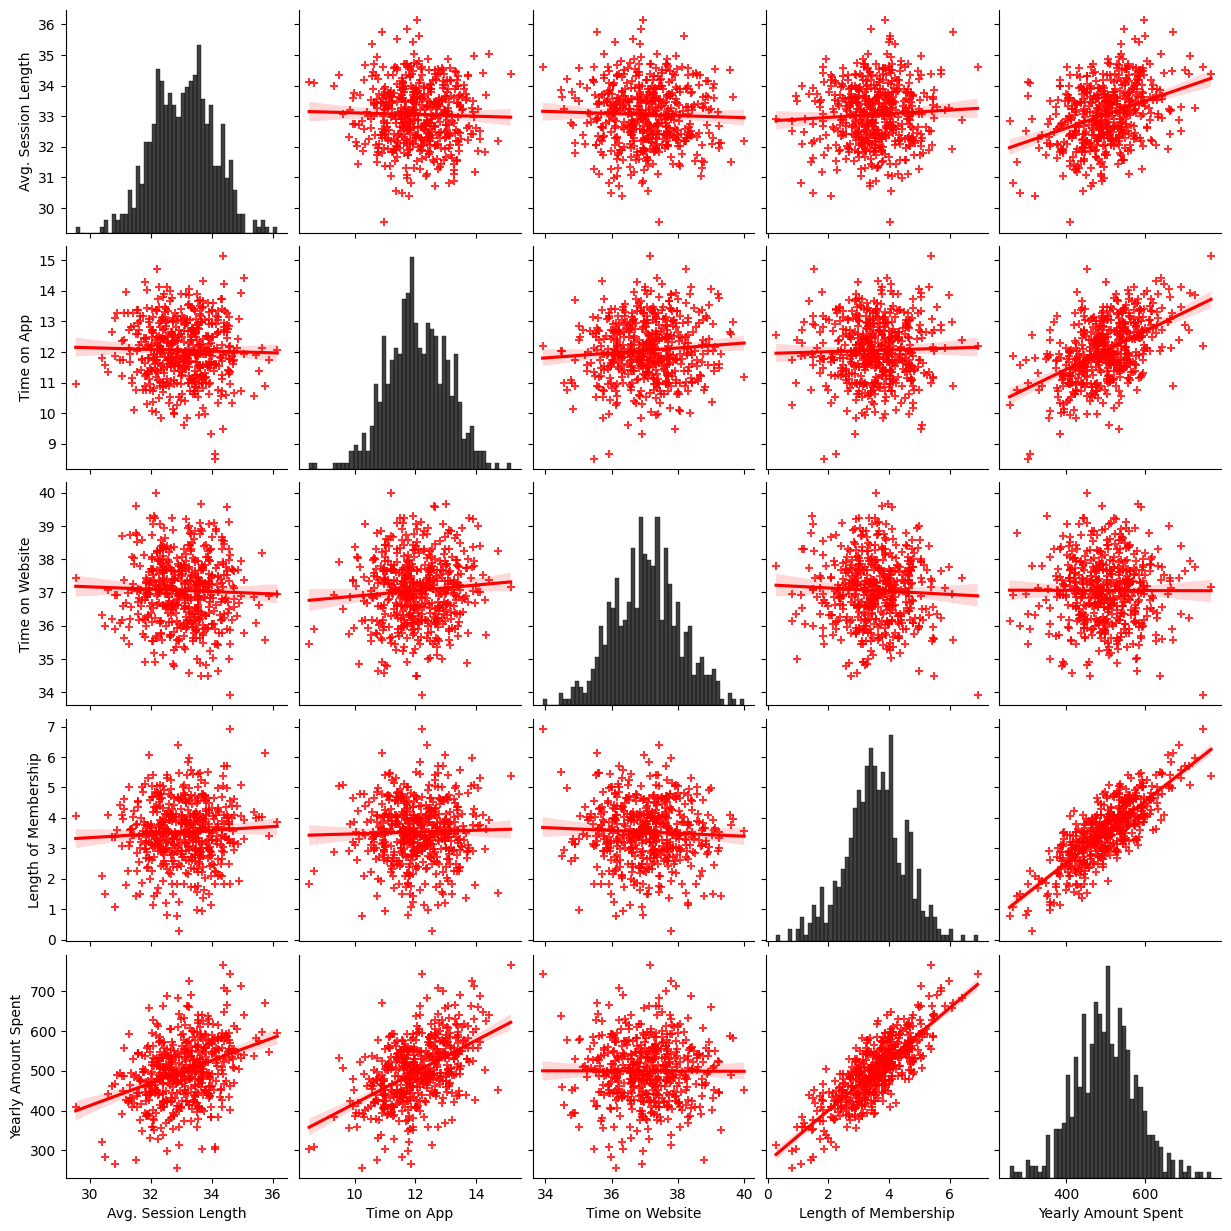

In [9]:
sns.pairplot (df, kind = "reg", plot_kws = {"marker":"+", "color":"red"}, diag_kws = {"color":"black", "bins":50})

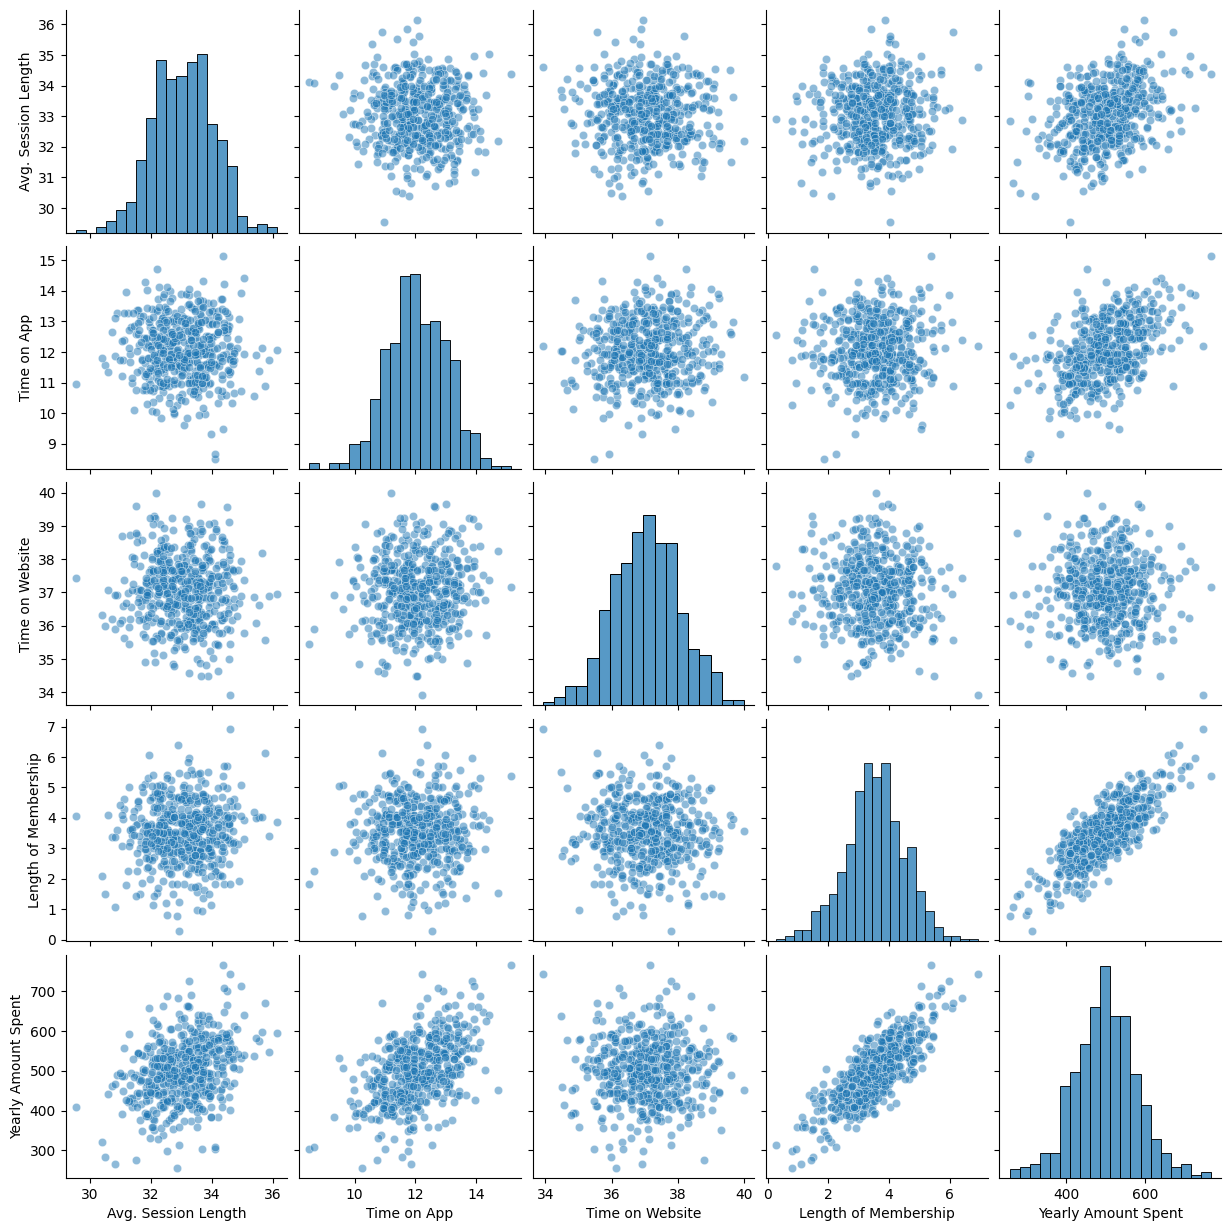

In [10]:
sns.pairplot (df, kind = "scatter", plot_kws={"alpha":0.5})

In [11]:
df_num = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]]
correlations = {}
columns = df_num.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df_num.loc[:, col_a], df.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                                PCC        p-value
Avg. Session Length__Length of Membership  0.060247   1.786179e-01
Avg. Session Length__Time on App          -0.027826   5.347504e-01
Avg. Session Length__Time on Website      -0.034987   4.350309e-01
Avg. Session Length__Yearly Amount Spent   0.355088   2.645094e-16
Length of Membership__Yearly Amount Spent  0.809084  4.806616e-117
Time on App__Length of Membership          0.029143   5.155923e-01
Time on App__Time on Website               0.082388   6.565420e-02
Time on App__Yearly Amount Spent           0.499328   6.905842e-33
Time on Website__Length of Membership     -0.047582   2.882809e-01
Time on Website__Yearly Amount Spent      -0.002641   9.530291e-01


In [12]:
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = df["Yearly Amount Spent"]

In [13]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [14]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [15]:
#random state can be any number, it will make a rule for the pseudorandom, so that later the same number creates the same random split
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25, random_state = 12)

model = lr()
model.fit(X_train, y_train)

print(model.coef_)    #coaf list [slope1, slope2... slope_n]
print(model.intercept_) #intercept point



[25.52607652 39.12556441  0.54637366 61.67638599]
-1054.0979896442263


In [16]:
model.score(X, y)

0.9842756124489649

In [17]:
#model with OLS (Ordinary least squares)

X2 = sm.tools.tools.add_constant(X_train)
X_test2 = sm.tools.tools.add_constant(X_test)
model2 = sm.regression.linear_model.OLS(y_train, X2)
model_fit = model2.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6179.
Date:                 Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                         16:29:06   Log-Likelihood:                -1394.1
No. Observations:                  375   AIC:                             2798.
Df Residuals:                      370   BIC:                             2818.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

Text(0.5, 1.0, 'Predicted vs true yearly spendings')

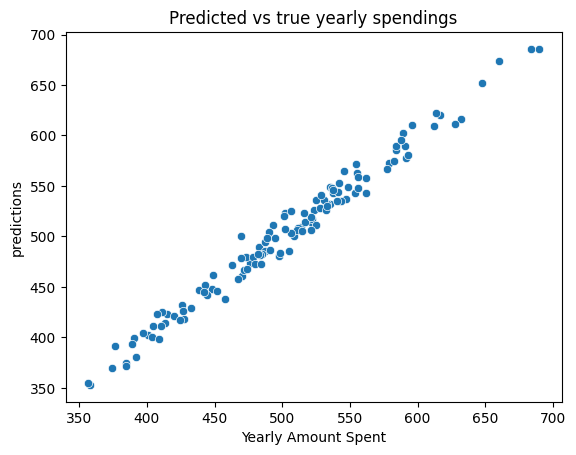

In [18]:
preds = model.predict(X_test)

sns.scatterplot(x = y_test, y = preds)
plt.ylabel("predictions")
plt.title("Predicted vs true yearly spendings")

In [19]:
ms_error = mse(y_test, preds)
print ("MSE = ", ms_error)
print ("RMSE = ", math.sqrt(ms_error) )
print ("MAE = ", mae(y_test, preds))

MSE =  97.17700106375852
RMSE =  9.857839573849766
MAE =  8.040135768754576


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

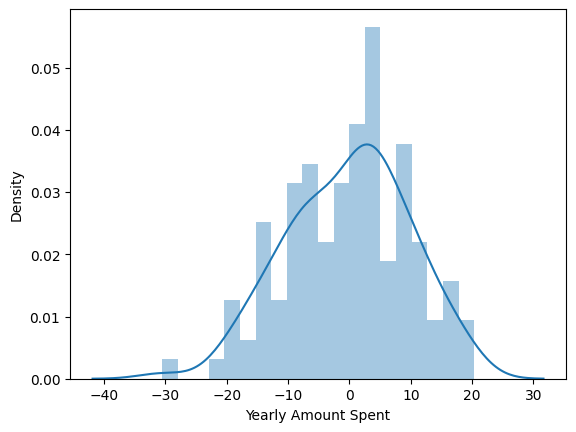

In [20]:
residuals = y_test - preds
sns.distplot(residuals, bins = 20)

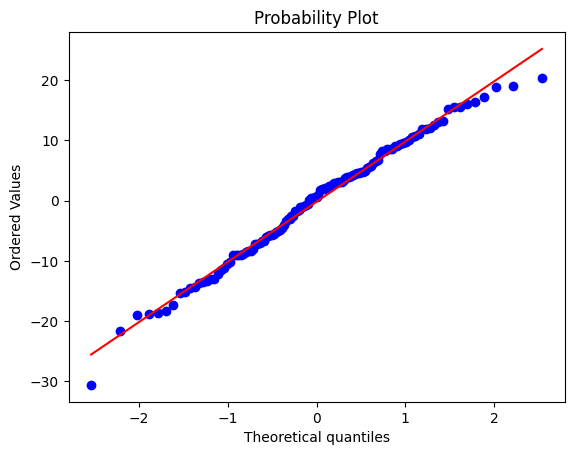

In [21]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()